# Resumes & The Job Application Process

An increasing number of companies these days are using [Applicant Tracking Systems](https://en.wikipedia.org/wiki/Applicant_tracking_system) some popular examples (at the time of writing) being [lever](https://www.lever.co/) & [greenhouse](https://grow.greenhouse.io)

Many of these provide aggegrate summary views of candidates and job description fit based on keyword analysis and other techniques to aid in pre-screening, in a classic cat & mouse game there are now services where candidates can optimize their resumes against a job description specifically to game these systems such as [skillsyncer](https://skillsyncer.com/)

This jupyter notebook is a light hearted analysis of my resume, there are an exhaustive number of services that can do this far more thoroughly if you want to get serious about it


## Word Cloud

Simple word cloud based on the content of my resume

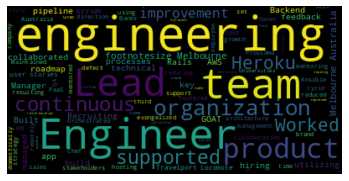

In [9]:
import resume_utils
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def combine_entry(e): return f'{e.date_location} {e.title} {e.company} {e.achievements}'

all_entries = map(combine_entry, resume_utils.parser('./Resume_ClintPlummer_ENMR.tex'))

word_cloud = WordCloud().generate(" ".join(all_entries))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Achievement Summary

My top three achievements ranked using [Latent_semantic_analysis](https://en.wikipedia.org/wiki/Latent_semantic_analysis)

In [7]:
import resume_utils
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

SUMY_LANGUAGE = 'english'
SUMY_SENTENCES_COUNT = 3

stemmer = Stemmer(SUMY_LANGUAGE)

summarizer = Summarizer(stemmer)
summarizer.stop_words = get_stop_words(SUMY_LANGUAGE)

achievements = [e.achievements for e in resume_utils.parser('./Resume_ClintPlummer_ENMR.tex')]

parser = PlaintextParser.from_string("\n".join(achievements), Tokenizer(SUMY_LANGUAGE))

for sentence in summarizer(parser.document, SUMY_SENTENCES_COUNT):
    print(f"{sentence}\n")

Lead, recruited & managed a team of 15 comprising of iOS (Swift) / Android (Kotlin) / Backend Engineers (Ruby/Golang Microservices) both co-located and remote, building a brand new yet unreleased app for GOAT

Worked with PM’s and key stakeholders to execute & deliver utilizing a combination of agile methodologies on an entirely new app & brand for GOAT Pragmatically defined & owned the product technology roadmap and set strategic direction to teams through deep collaboration with product owners, engineers, QA & other stakeholders, roadmap artifact were created in the form of user stories & through visual language eg.

Facilitated growth of the company from 5 - 50 employee’s through formulation & articulation of the vision and goals to scrum teams via story mapping sessions, five whys, kick off's, pair programming & mentoring & improvements to documentation & processes



## Title Frequency Distribution

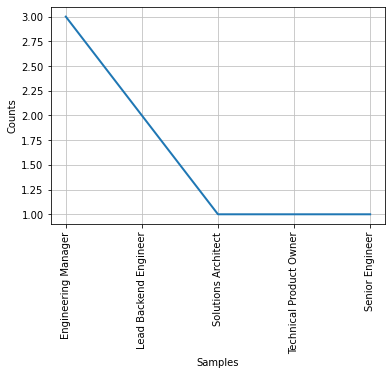

In [8]:
import resume_utils
import nltk

def split_title(title): return [t.strip() for t in title.split('/')]
    
titles = [split_title(e.title) for e in resume_utils.parser('./Resume_ClintPlummer_ENMR.tex')]

flatten_titles = [j for sub in titles for j in sub] # flatten the array, I miss ruby's Array\#flatten

freq = nltk.FreqDist(flatten_titles)
freq.plot(20, cumulative=False)